# Pymaceuticals Inc.
---

### Analysis

 - The database given had 5 duplicate entries for Mouse ID g889. There were 2 entries for Timepoints 0, 5, 10, 15, and 20. Those duplicate entries were removed.
- Based on the summary statistics for the Tumor Volume for each drug regimen, the data is likely symmetrical distributed, as the mean and median of all regimens are close to each other. The difference is approximately +/- 2.0.
- Based on the summary statistics for the Tumor Volume (mm3) for each drug regimen, Capomulin and Ramicare have the lowest Std Dev, which might suggest a more consistent drug effect on the mice population receiving those drugs.
- On regards to the SEM for the Tumor Volume (mm3) for each drug regimen, and using the Relative Standard Error (RSE) or Coefficient of Variation of the Mean, the data realted to all the regimens show a high presicion as the RSE is lower than 5% for all of them.
- Capomulin and Ramicane are the drug regimens with the highest number of observed mouse time points, both having more than 225 time points in total.
- 50.7% of the mice tested were Male, and 49.3% were female.
- When running the Quartiles, Outliers and Boxplots analysis for Capomulin, Ramicane, Infubinol and Ceftamin, at the last Timepoint for each Mouse ID treated with one of these drugs, the only drug regimen with an outlier is Infubinol as there is a entry with Tumor Volume (mm3) of 36.321346 when the lower bound of the Boxplot for this drug regimen is 36.83.
- By creating a line chart for the Capomulin treatment results on mouse l509, we can see the drug's effect on Tumor Volume (mm3). During the first 20 days, there was a volume increase, and from there on, there was a volume decrease, with some increase between days 25 and 30 and from day 35 to day 45. From the first Timepoint until the last, there is a volume decrease going from 45 mm3 to 41 mm3.
- Analizing the Weight versus the Average Tumor Volume (mm3) of Mouse ID treated with Capomulin, on the scatter plot we can see a positive strong correlation between the variables, which is then confirmed with a Pearson Correlation Coefficient of 0.84.
- For the variables compared in the above analysis, the linear equation that best fits the observed data is Y = 0.95(X) + 21.55, Y being the Average Tumor Volume (mm3) and X the mouse's weight.

In [16]:
# Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Read csv files
mouse_csv = pd.read_csv("data/Mouse_metadata.csv")
study_csv = pd.read_csv("data/Study_results.csv")

# Combine the data into a single DataFrame
mouse_study_merge_df = pd.merge(study_csv, mouse_csv, on="Mouse ID")

# Display the data table for preview
mouse_study_merge_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [17]:
# Display the number of mice
len(mouse_csv)

249

In [18]:
# Display the number of unique mice IDs in the df
len(mouse_study_merge_df["Mouse ID"].unique())

249

In [19]:
# Identify the mice IDs with duplicate entries
mouse_group = mouse_study_merge_df.groupby(["Mouse ID"])
duplicate_mice = mouse_group["Timepoint"].value_counts()
duplicate_mice[duplicate_mice > 1]

Mouse ID  Timepoint
g989      0            2
          5            2
          10           2
          15           2
          20           2
Name: count, dtype: int64

In [20]:
# Drop mouse ID with duplicate time points and keep only the first entry (total entries to be removed 5)
cleaned_mouse_df = mouse_study_merge_df.drop_duplicates(subset=["Mouse ID", "Timepoint"], keep="first")
cleaned_mouse_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [21]:
# Display the number of unique mice IDs in the cleaned df
len(cleaned_mouse_df["Mouse ID"].unique())

249

## Summary Statistics

In [22]:
# Create a DataFrame of summary statistics
# A row for each drug regimen. These regimen names should be contained in the index column.
drug_df = cleaned_mouse_df.groupby("Drug Regimen")

# A column for each of the following statistics: mean, median, variance, standard deviation, and SEM of the tumor volume.
drug_mean = drug_df["Tumor Volume (mm3)"].mean()
drug_median = drug_df["Tumor Volume (mm3)"].median()
drug_variance = drug_df["Tumor Volume (mm3)"].var()
drug_standev = drug_df["Tumor Volume (mm3)"].std()
drug_sem = drug_df["Tumor Volume (mm3)"].sem()

drug_summary = pd.DataFrame({"Mean": round(drug_mean, 2),
                             "Median": round(drug_median, 2),
                             "Variance": round(drug_variance, 2),
                             "Std Dev": round(drug_standev, 2),
                             "SEM": round(drug_sem, 2)})

#To express the Standard Error of the Mean (SEM) as a percentage, you can use the concept of Relative Standard Error (RSE) or Coefficient of Variation of the Mean
drug_summary["RSE"] = ((drug_summary["SEM"] / drug_summary["Mean"]) * 100).map("{:.2f}%".format)
drug_summary

,Mean,Median,Variance,Std Dev,SEM,RSE
Drug Regimen,,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33,0.81%
Ceftamin,52.59,51.78,39.29,6.27,0.47,0.89%
Infubinol,52.88,51.82,43.13,6.57,0.49,0.93%
Ketapril,55.24,53.70,68.55,8.28,0.60,1.09%
Naftisol,54.33,52.51,66.17,8.13,0.60,1.10%
Placebo,54.03,52.29,61.17,7.82,0.58,1.07%
Propriva,52.39,50.91,43.14,6.57,0.53,1.01%
Ramicane,40.22,40.67,23.49,4.85,0.32,0.80%
Stelasyn,54.23,52.43,59.45,7.71,0.57,1.05%


## Bar and Pie Charts

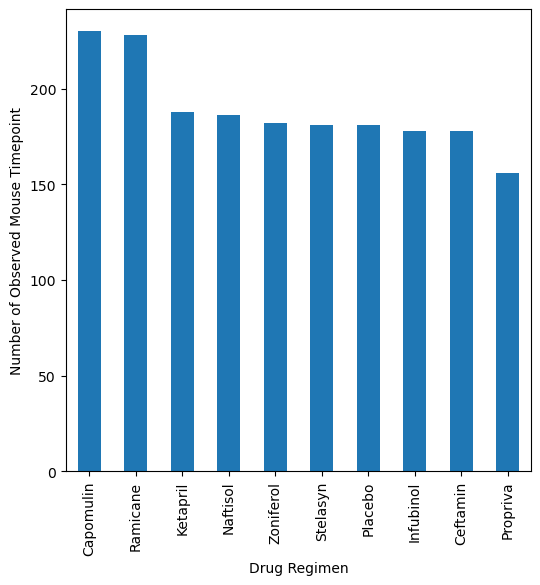

In [23]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
drug_regimen_counts = cleaned_mouse_df["Drug Regimen"].value_counts()
drug_regimen_counts.plot(kind="bar", figsize=(6, 6), xlabel="Drug Regimen", ylabel="Number of Observed Mouse Timepoint")
plt.show()

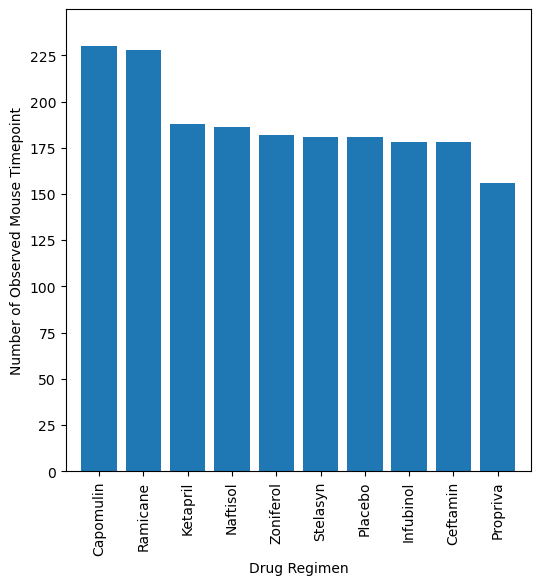

In [36]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
x_values = drug_regimen_counts.index
y_values = drug_regimen_counts.values
plt.figure(figsize=(6, 6))
plt.bar(x_values, y_values, alpha=1, align="center")
plt.xticks(rotation=90)
plt.yticks(range(0, y_values.max()+20, 25))
plt.xlim(-0.75, len(x_values)-0.25)
plt.ylim(0, max(y_values)+20)
plt.xlabel("Drug Regimen") 
plt.ylabel("Number of Observed Mouse Timepoint")
plt.show()

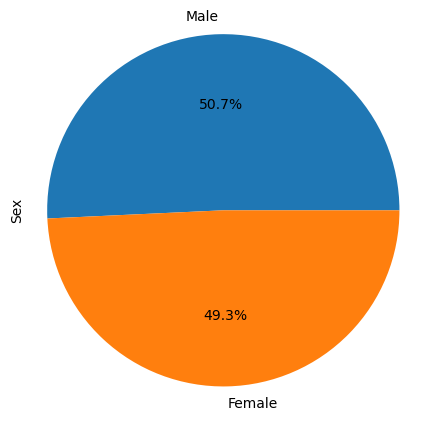

In [25]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_counts = cleaned_mouse_df["Sex"].value_counts()
gender_plot = gender_counts.plot(kind="pie", figsize=(5, 5), y="Sex", autopct="%1.1f%%")
gender_plot.set_ylabel("Sex")
plt.axis("equal")
plt.show()

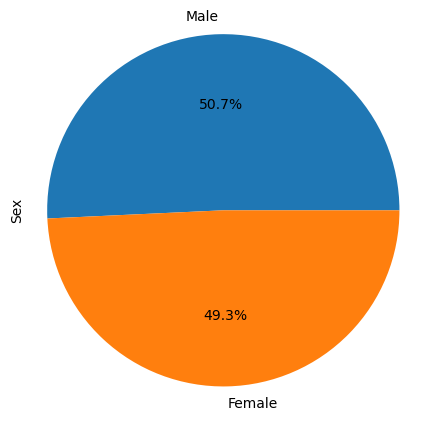

In [26]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
pie_var = cleaned_mouse_df["Sex"].value_counts()
plt.figure(figsize=(5, 5))
plt.pie(pie_var, labels=pie_var.index, autopct="%1.1f%%", startangle=0)
plt.ylabel("Sex")
plt.axis("equal")
plt.show()

## Quartiles, Outliers and Boxplots

In [27]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens: Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = cleaned_mouse_df.groupby("Mouse ID")["Timepoint"].max()
last_timepoint.head(10)

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merge_last_timepoint_df = pd.merge(last_timepoint, cleaned_mouse_df, on="Mouse ID", how ="left")
merge_last_timepoint_df = merge_last_timepoint_df.rename(columns={"Timepoint_x": "Last Timepoint", "Timepoint_y": "Timepoint"})
merge_last_timepoint_df = merge_last_timepoint_df.loc[(merge_last_timepoint_df["Last Timepoint"] == merge_last_timepoint_df["Timepoint"]), :]
greates_timepoint_df = merge_last_timepoint_df.reset_index()
greates_timepoint_df

,index,Mouse ID,Last Timepoint,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,9,a203,45,45,67.973419,2,Infubinol,Female,20,23
1,19,a251,45,45,65.525743,1,Infubinol,Female,21,25
2,29,a262,45,45,70.717621,4,Placebo,Female,17,29
3,39,a275,45,45,62.999356,3,Ceftamin,Female,20,28
4,46,a366,30,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...,...,...
244,1847,z435,10,10,48.710661,0,Propriva,Female,12,26
245,1857,z578,45,45,30.638696,0,Ramicane,Male,11,16
246,1867,z581,45,45,62.754451,3,Infubinol,Female,24,25
247,1877,z795,45,45,65.741070,3,Naftisol,Female,13,29


In [28]:
# Put treatments into a list for for loop (and later for plot labels)
x_labels = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in x_labels:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    mouse_vol_df = greates_timepoint_df.loc[(greates_timepoint_df["Drug Regimen"] == drug), "Tumor Volume (mm3)"]
    
    # add subset 
    tumor_vol.append(mouse_vol_df)
    
    # Determine outliers using upper and lower bounds
    quartiles = mouse_vol_df.quantile([.25,.75])
    q1 = quartiles[0.25]
    q3 = quartiles[0.75]
    iqr = q3-q1
    lower_bound = q1 - (1.5*iqr)
    upper_bound = q3 + (1.5*iqr)
    outliers = mouse_vol_df.loc[(mouse_vol_df < lower_bound) | (mouse_vol_df > upper_bound)]

    print(f"{drug}'s:")
    print(f"{mouse_vol_df.min()}")
    print(f"Lower Bound: {round(lower_bound, 2)}")
    print(f"Upper Bound: {round(upper_bound, 2)}")
    print(f"Potential Outliers: {outliers}")
    print("=============================")

Capomulin's:
23.34359787
Lower Bound: 20.7
Upper Bound: 51.83
Potential Outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's:
22.05012627
Lower Bound: 17.91
Upper Bound: 54.31
Potential Outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's:
36.3213458
Lower Bound: 36.83
Upper Bound: 82.74
Potential Outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's:
45.0
Lower Bound: 25.36
Upper Bound: 87.67
Potential Outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


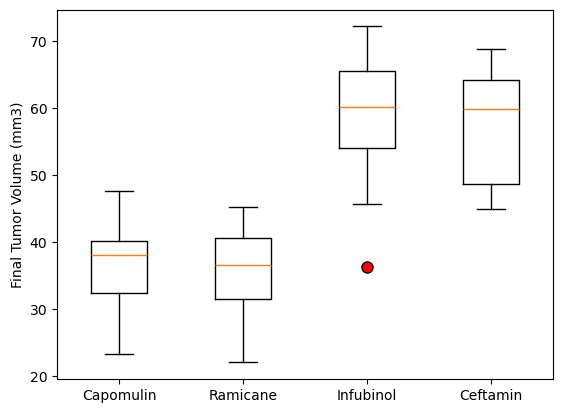

In [29]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.subplots()
plt.ylabel("Final Tumor Volume (mm3)")
plt.boxplot(tumor_vol, flierprops=dict(marker='o', markerfacecolor='r', markersize=8))
plt.xticks(range(1, len(x_labels) + 1), x_labels)
plt.show()

## Line and Scatter Plots

In [30]:
# df for single mouse treated with Capomulin
one_mouse_capomulin = cleaned_mouse_df.loc[(cleaned_mouse_df["Mouse ID"] == "l509") & (cleaned_mouse_df["Drug Regimen"] == "Capomulin"), :]
one_mouse_capomulin

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
231,l509,0,45.000000,0,Capomulin,Male,17,21
253,l509,5,45.851193,0,Capomulin,Male,17,21
539,l509,10,46.759074,0,Capomulin,Male,17,21
881,l509,15,47.488599,1,Capomulin,Male,17,21
982,l509,20,48.070452,2,Capomulin,Male,17,21
1146,l509,25,44.006257,2,Capomulin,Male,17,21
1414,l509,30,44.708055,2,Capomulin,Male,17,21
1499,l509,35,40.207288,2,Capomulin,Male,17,21
1723,l509,40,40.770813,2,Capomulin,Male,17,21
1771,l509,45,41.483008,3,Capomulin,Male,17,21


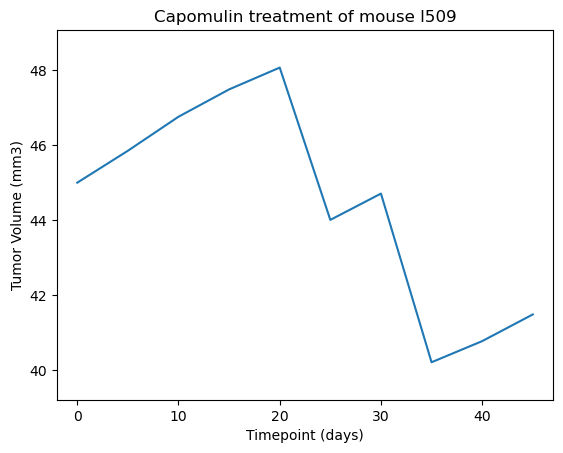

In [31]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
x_labels = one_mouse_capomulin["Timepoint"]
y_labels = one_mouse_capomulin["Tumor Volume (mm3)"]
plt.plot(x_labels, y_labels)
plt.title("Capomulin treatment of mouse l509")
plt.xlabel("Timepoint (days)") 
plt.ylabel("Tumor Volume (mm3)")
plt.xlim(x_labels.min()-2, x_labels.max()+2)
plt.ylim(y_labels.min()-1, y_labels.max()+1)
plt.show()

In [32]:
# df for the entire Capomulin regimen
capomulin_df = cleaned_mouse_df.loc[cleaned_mouse_df["Drug Regimen"] == "Capomulin", :]
capomulin_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
226,j246,0,45.000000,0,Capomulin,Female,21,21
227,r554,0,45.000000,0,Capomulin,Female,8,17
228,s185,0,45.000000,0,Capomulin,Female,3,17
229,b742,0,45.000000,0,Capomulin,Male,7,21
...,...,...,...,...,...,...,...,...
1854,s710,45,40.728578,1,Capomulin,Female,1,23
1859,j119,45,38.125164,1,Capomulin,Female,7,23
1878,i557,45,47.685963,1,Capomulin,Female,1,24
1888,r944,45,41.581521,2,Capomulin,Male,12,25


In [33]:
# df with average tumor volume and first weight record per mouse
avg_tumor_volume = capomulin_df.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()
mouse_weights = capomulin_df.groupby("Mouse ID")["Weight (g)"].first()
scatter_plot_data = pd.DataFrame({"Avg Tumor Volume": avg_tumor_volume, "Weight": mouse_weights})
scatter_plot_data.head()


,Avg Tumor Volume,Weight
Mouse ID,,
b128,41.963636,22
b742,40.083699,21
f966,36.505973,17
g288,41.990097,19
g316,44.613344,22


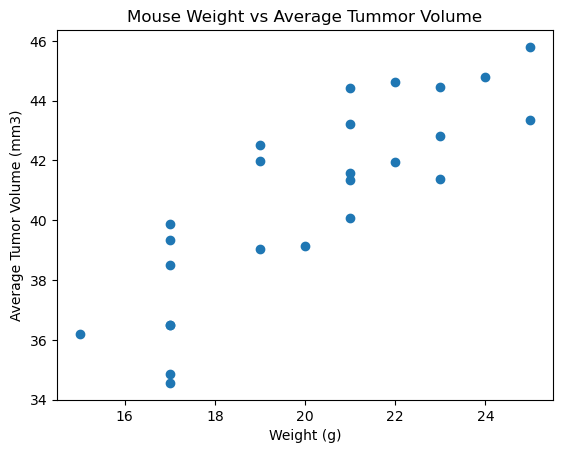

In [34]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
x_axis = scatter_plot_data["Weight"]
y_axis = scatter_plot_data["Avg Tumor Volume"]
plt.scatter(x_axis, y_axis, marker="o")
plt.title("Mouse Weight vs Average Tummor Volume")
plt.xlabel("Weight (g)") 
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


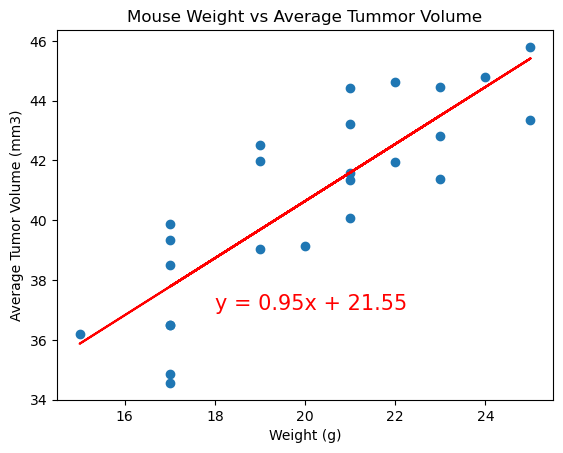

In [35]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = slope * x_axis + intercept
print(f"The correlation between mouse weight and the average tumor volume is {round(rvalue, 2)}")

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis, y_axis, marker="o")
plt.title("Mouse Weight vs Average Tummor Volume")
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(18,37),fontsize=15,color="red")
plt.xlabel("Weight (g)") 
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()